
# Music Genre Classification using Machine Learning


## Imports

In [2]:
# Standard library imports
import warnings

# Third-party imports for data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Audio processing library
import librosa
import librosa.display

# Machine learning preprocessing and model selection
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, minmax_scale
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 


# Statistical distributions for randomized search
from scipy.stats import loguniform, randint

# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# Set up the aesthetics for seaborn plots
sns.set(style="whitegrid")

# Ensure that plots are displayed in the Jupyter Notebook
%matplotlib inline

c:\Users\rjaga\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,



## Exploring a Sample from the GTZAN Dataset



In [3]:
audio_path = "Data\genres_original\disco\disco.00004.wav"
audio, sr = librosa.load(audio_path)



## Visualizing Audio Data: Waveform Plot of a Pop Music Sample



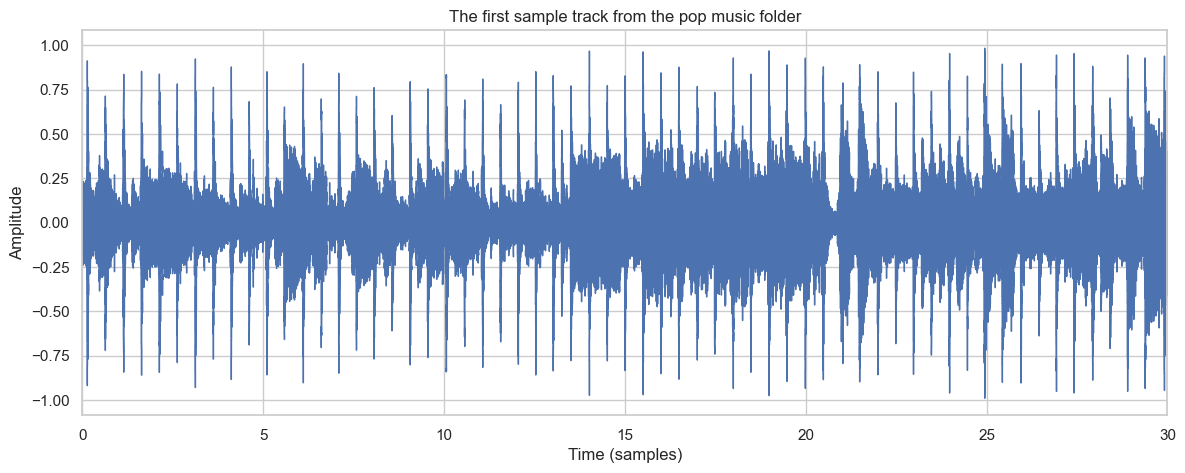

In [4]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sr)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('The first sample track from the pop music folder')
plt.xlim([0,30])
plt.show()


## Analyzing Audio Features in the GTZAN Dataset




## Chroma STFT


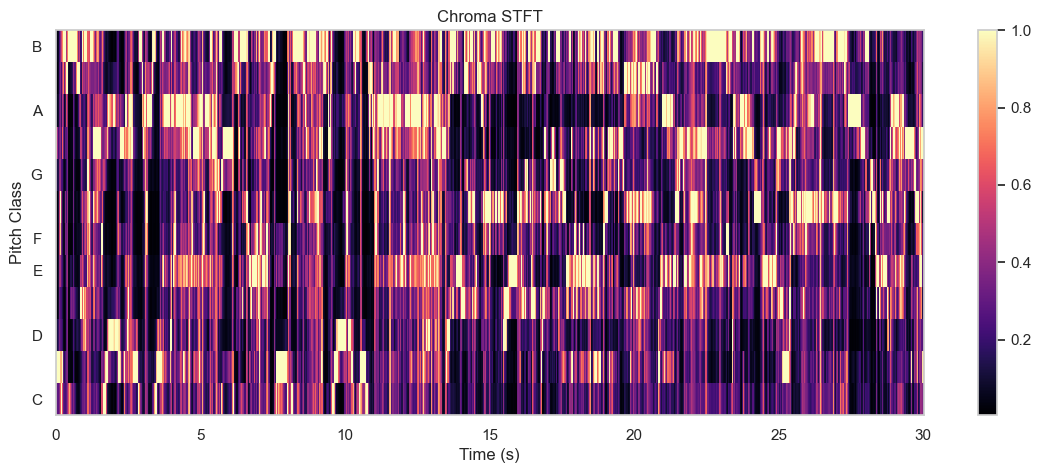

In [5]:
chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(chroma_stft, x_axis='time', y_axis='chroma', sr=sr)
plt.colorbar()
plt.xlabel('Time (s)')
plt.ylabel('Pitch Class')
plt.title('Chroma STFT')
plt.show()


## RMS Mean



In [6]:
rms = librosa.feature.rms(y=audio)
rms_mean = rms.mean()

print("RMS Mean:", rms_mean)

RMS Mean: 0.11454933




## Spectral Centroid Mean




In [7]:
spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)
spectral_centroids_mean = spectral_centroids.mean()

print("Spectral Centroid Mean:", spectral_centroids_mean)

Spectral Centroid Mean: 3328.4809116755855


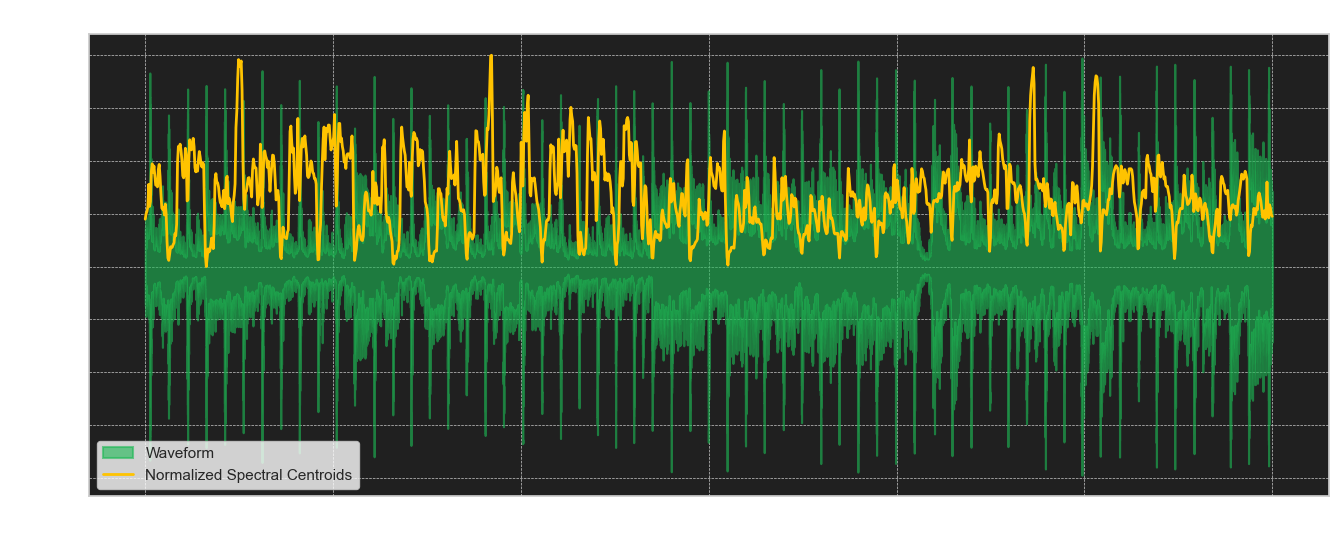

In [8]:
# Calculate the spectral centroids
spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)

# Computing the time variable for visualization
frames = range(len(spectral_centroids[0]))
t = librosa.frames_to_time(frames, sr=sr)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

# Use a stylish plot theme
plt.style.use('seaborn-dark-palette')

# Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.set_facecolor('#202020')  # Set a dark background color

# Waveform plot
librosa.display.waveshow(audio, sr=sr, alpha=0.6, color='#1DB954', linewidth=1.5, label='Waveform')

# Spectral centroids plot
plt.plot(t, normalize(spectral_centroids[0]), color='#FFC300', linewidth=2, label='Normalized Spectral Centroids')

# Enhancing the plot
plt.title('Waveform and Normalized Spectral Centroids', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Time (seconds)', fontsize=14, color='white')
plt.ylabel('Normalized Amplitude / Frequency', fontsize=14, color='white')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Show the plot
plt.show()


# Spectral Bandwidth Mean





In [9]:
spectral_bandwidths = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
spectral_bandwidths_mean = spectral_bandwidths.mean()

print("Spectral Bandwidth Mean:", spectral_bandwidths_mean)

Spectral Bandwidth Mean: 3111.671947152701



# Spectral Rolloff Mean


In [10]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
spectral_rolloff_mean = spectral_rolloff.mean()

print("Spectral Rolloff Mean:", spectral_rolloff_mean)

Spectral Rolloff Mean: 7195.770306155742


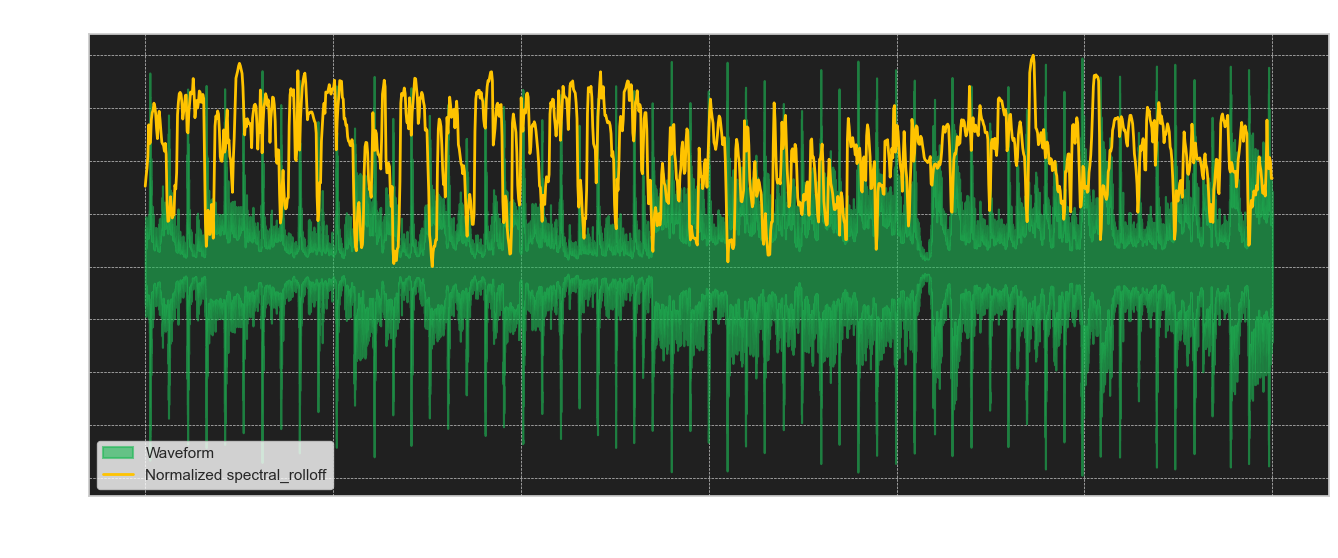

In [11]:
# Computing the time variable for visualization
frames = range(len(spectral_rolloff [0]))
t = librosa.frames_to_time(frames, sr=sr)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

# Use a stylish plot theme
plt.style.use('seaborn-dark-palette')

# Plotting the spectral_rolloff along the waveform
plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.set_facecolor('#202020')  # Set a dark background color

# Waveform plot
librosa.display.waveshow(audio, sr=sr, alpha=0.6, color='#1DB954', linewidth=1.5, label='Waveform')

# chroma_cens plot
plt.plot(t, normalize(spectral_rolloff[0]), color='#FFC300', linewidth=2, label='Normalized spectral_rolloff')

# Enhancing the plot
plt.title('Waveform and Normalized spectral_rolloff', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Time (seconds)', fontsize=14, color='white')
plt.ylabel('Normalized Amplitude / Frequency', fontsize=14, color='white')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Show the plot
plt.show()


# Zero-Crossing Rate Mean



In [12]:
zero_crossing_rates = librosa.feature.zero_crossing_rate(y=audio)
zero_crossing_rates_mean = zero_crossing_rates.mean()

print("Zero-Crossing Rate Mean:", zero_crossing_rates_mean)

Zero-Crossing Rate Mean: 0.16901441959106728



# Harmony Mean




In [13]:
chroma_cens = librosa.feature.chroma_cens(y=audio, sr=sr)
harmony_mean = chroma_cens.mean()

print("Harmony Mean:", harmony_mean)

Harmony Mean: 0.28361753


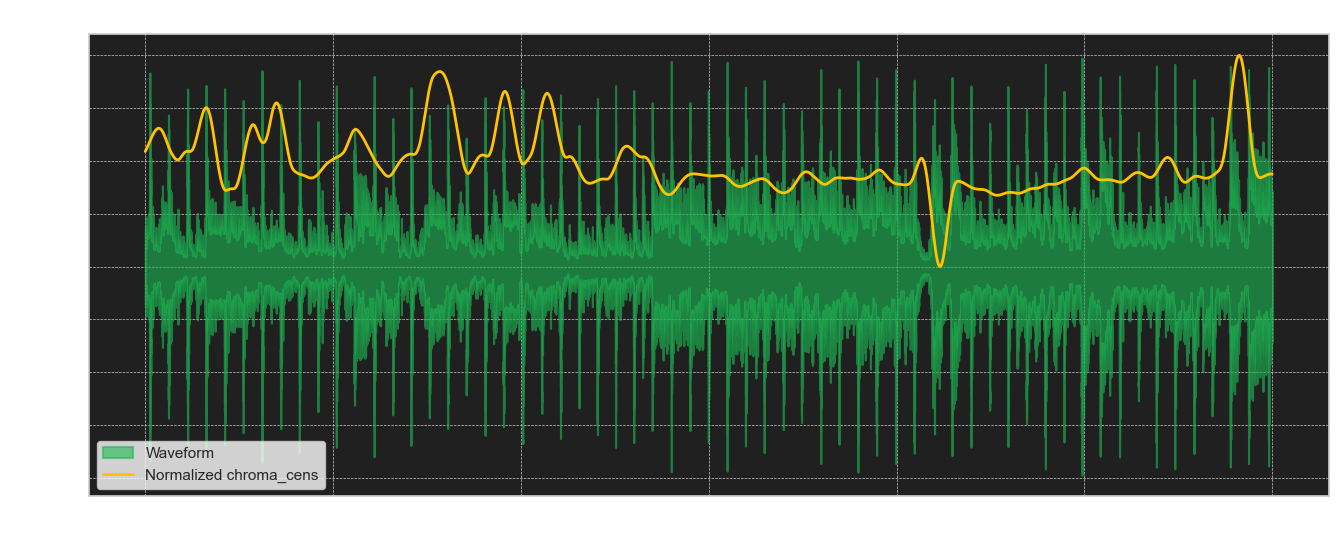

In [14]:
# Computing the time variable for visualization
frames = range(len(chroma_cens[0]))
t = librosa.frames_to_time(frames, sr=sr)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

# Use a stylish plot theme
plt.style.use('seaborn-dark-palette')

# Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.set_facecolor('#202020')  # Set a dark background color

# Waveform plot
librosa.display.waveshow(audio, sr=sr, alpha=0.6, color='#1DB954', linewidth=1.5, label='Waveform')

# chroma_cens plot
plt.plot(t, normalize(chroma_cens[0]), color='#FFC300', linewidth=2, label='Normalized chroma_cens')

# Enhancing the plot
plt.title('Waveform and Normalized chroma_cens', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Time (seconds)', fontsize=14, color='white')
plt.ylabel('Normalized Amplitude / Frequency', fontsize=14, color='white')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Show the plot
plt.show()



# Tempo Mean




In [15]:
tempo, _ = librosa.beat.beat_track(y=audio, sr=sr)
tempo_mean = tempo.mean()

print("Tempo Mean (BPM):", tempo_mean)

Tempo Mean (BPM): 123.046875




# Mel Frequency Cepstral Coefficients (MFCC)



c:\Users\rjaga\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\Users\rjaga\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


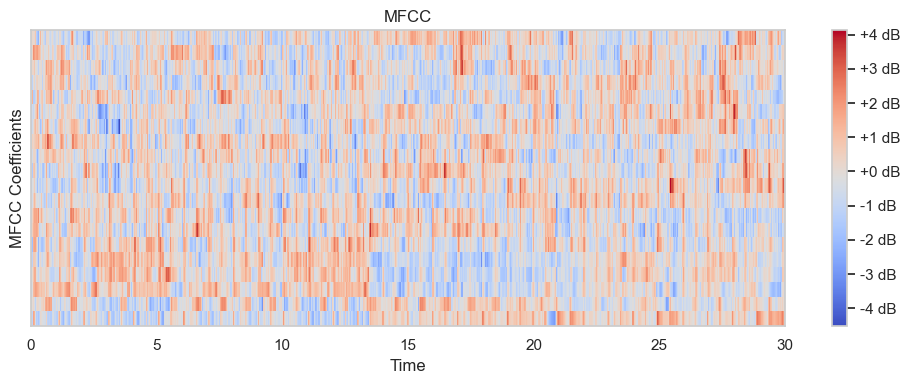

In [16]:
# Compute MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sr)

# Apply Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()



## Loading the Data



In [17]:
df = pd.read_csv("Data/features_3_sec.csv")

In [18]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [19]:
df.shape


(9990, 60)

In [20]:
df.iloc[1,:]   # here, the name of the features has been listed

filename                   blues.00000.1.wav
length                                 66149
chroma_stft_mean                    0.343065
chroma_stft_var                     0.086147
rms_mean                            0.112699
rms_var                              0.00145
spectral_centroid_mean           1816.693777
spectral_centroid_var           90525.690866
spectral_bandwidth_mean          2010.051501
spectral_bandwidth_var          65671.875673
rolloff_mean                     3869.682242
rolloff_var                    672244.760273
zero_crossing_rate_mean             0.087173
zero_crossing_rate_var               0.00103
harmony_mean                       -0.000099
harmony_var                          0.00495
perceptr_mean                      -0.000103
perceptr_var                        0.004854
tempo                             123.046875
mfcc1_mean                       -125.590706
mfcc1_var                        2038.344238
mfcc2_mean                        122.421227
mfcc2_var 

In [21]:
df = df.drop('filename', axis = 1)



## Exploratory Data Analysis (EDA)

### Correlation Heatmap


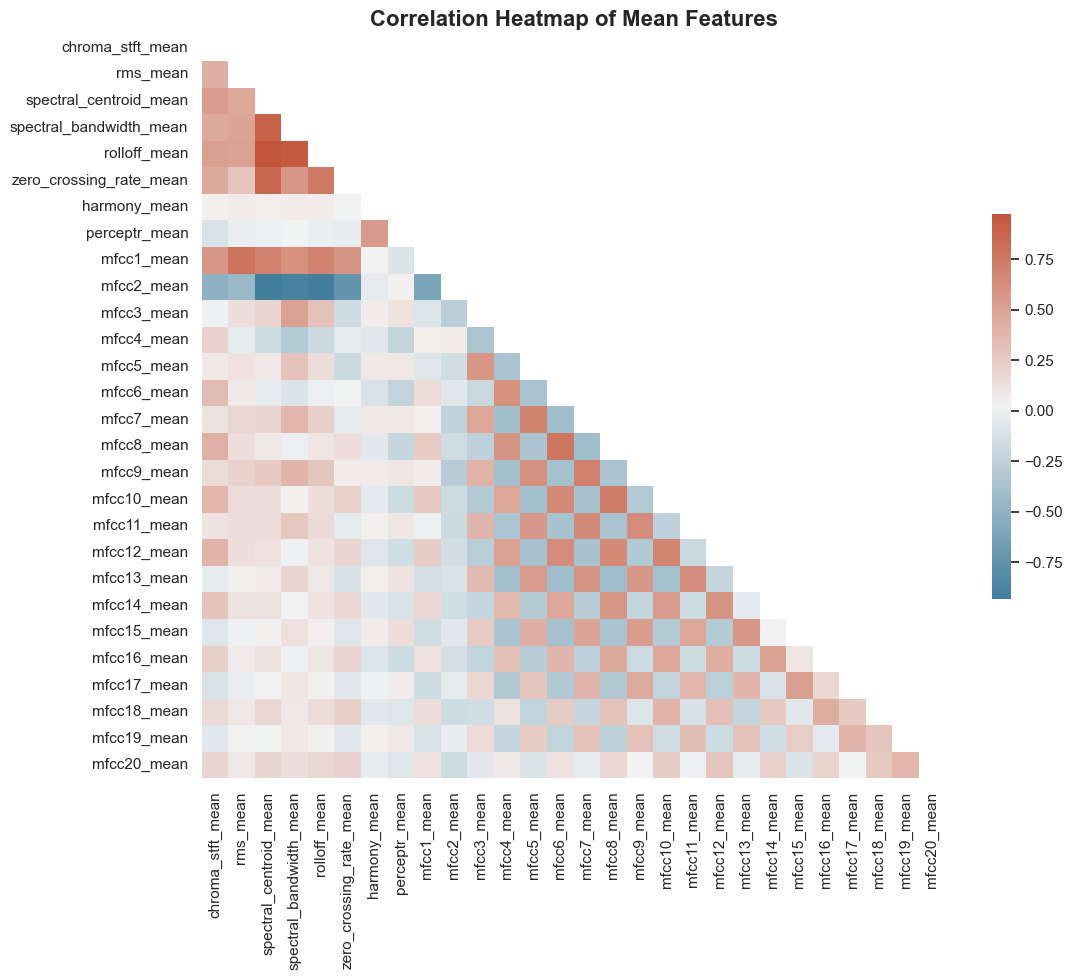

In [22]:
mean_columns = df.filter(regex='_mean$')

correlation_matrix = mean_columns.corr()

# Create a boolean mask for the upper triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=False, linewidths=0,
            cbar_kws={"shrink": .5}, square=True)

# Add a title to the heatmap
plt.title('Correlation Heatmap of Mean Features', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

### Box Plot for Genres Distributions

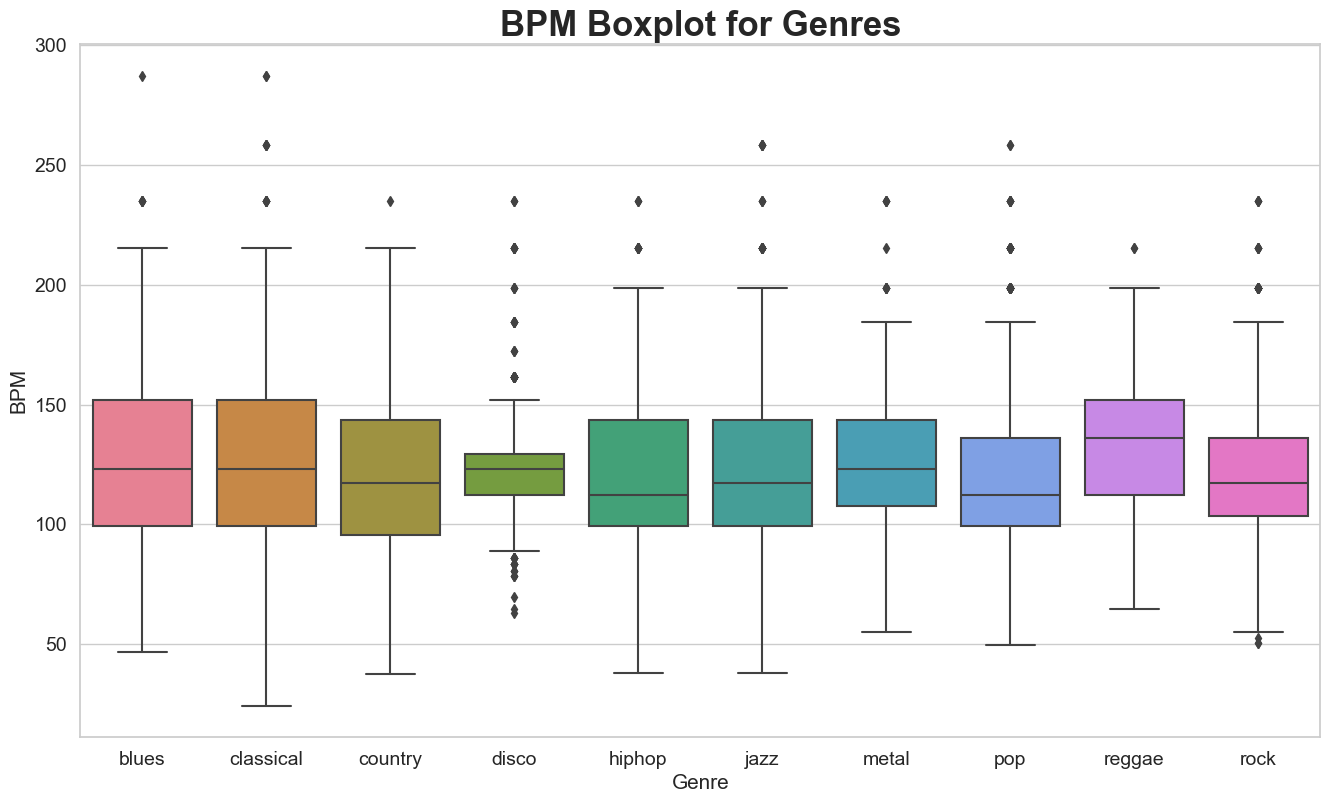

In [23]:
# Subset the DataFrame to include only the 'label' and 'tempo' columns
x = df[["label", "tempo"]]

# Create the plot
f, ax = plt.subplots(figsize=(16, 9))
sns.boxplot(x="label", y="tempo", data=x, palette='husl')

# Styling the plot with titles and labels
plt.title('BPM Boxplot for Genres', fontsize=25, fontweight='bold')
plt.xlabel("Genre", fontsize=15)
plt.ylabel("BPM", fontsize=15)

# Setting the font size for x and y ticks for better readability
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()

### Principal Component Analysis

1. Normalization
2. PCA
3. The Scatter Plot

In [24]:
# data = pd.read_csv("/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv")
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']


#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

# 44.93 variance explained

array([0.26745621, 0.18238003])

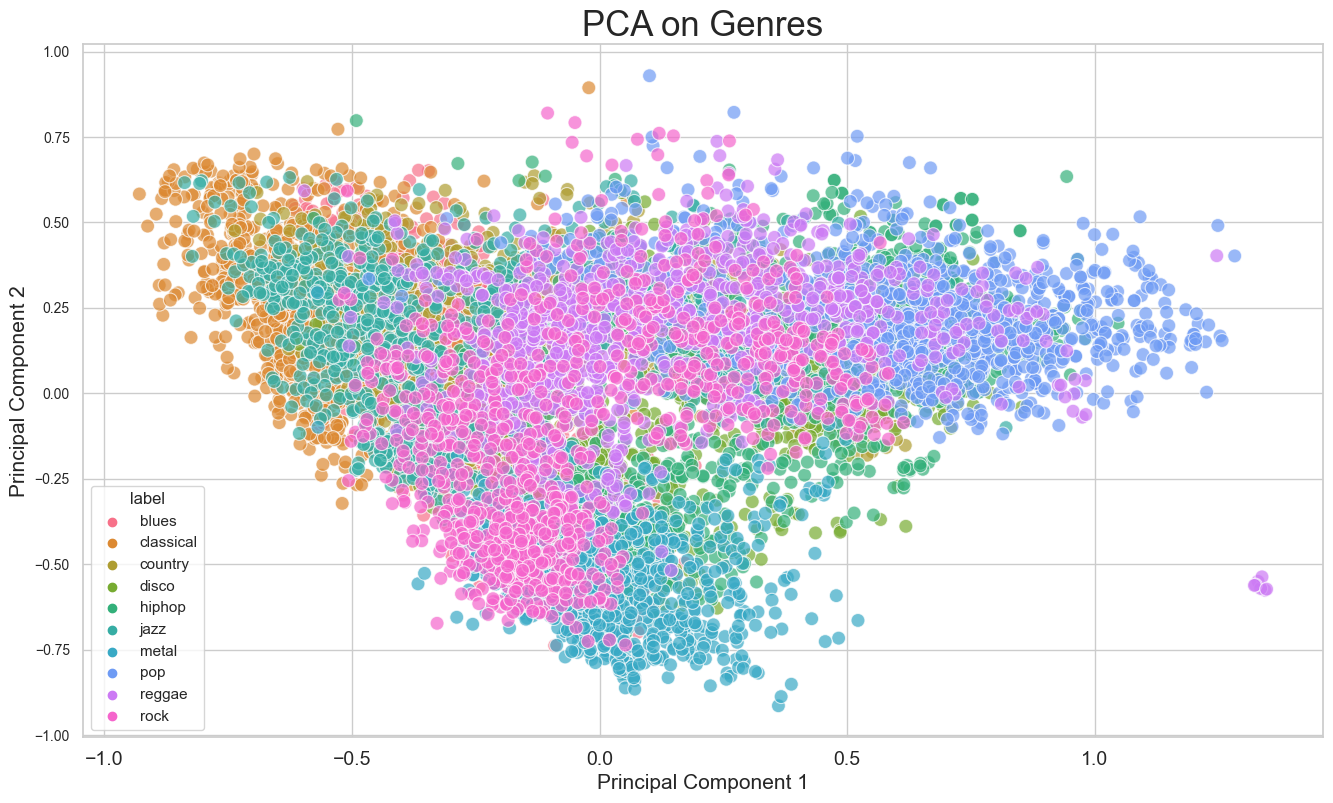

In [25]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")



## Machine Learning Methods



In [26]:
def plot_history(hist):
    plt.figure(figsize=(20,15))
    fig, axs = plt.subplots(2)
    # accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

In [27]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, 
                                                    random_state = 42)


## Encoding Music Genres with LabelEncoder



In [28]:
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.transform(y_test)
len(labelencoder.classes_)

10

## Feature Scaling with StandardScaler



### Using `StandardScaler` from Scikit-learn



In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(7992, 58)



## Support Vector Machine (SVM)


In [30]:
# Define the parameter distribution for SVM
param_dist_svm = {
    'C': loguniform(1e-4, 1e+1),  # Narrower range for C
    'kernel': ['linear', 'rbf'],  # Only linear and RBF kernels
    # 'gamma': loguniform(1e-4, 1e-3)  # Consider removing if using a linear kernel
}

# Create the SVM classifier and randomized search object
svm = SVC(random_state=42)
random_search_svm = RandomizedSearchCV(
    svm, param_distributions=param_dist_svm, n_iter=50,  # Reduced number of iterations
    scoring='accuracy', n_jobs=-1, random_state=42  # Use all available cores
)

# Fit the randomized search to the data
random_search_svm.fit(X_train, y_train)

# Evaluate the SVM model with the best parameters on the test set
best_svm = random_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Evaluate the SVM model on the training set
y_train_pred_svm = best_svm.predict(X_train)
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)

print("Train SVM Accuracy:", train_accuracy_svm)
print("Test SVM Accuracy:", test_accuracy_svm)

Train SVM Accuracy: 0.994994994994995
Test SVM Accuracy: 0.9309309309309309



## Random Forest (RF)


In [31]:
# Define the parameter distribution for Random Forest
param_dist_rf = {
    'n_estimators': randint(10, 101),  # Reduced upper limit for faster computation
    'max_features': ['auto', 'sqrt'],  # Simplified choice of max features
    'max_depth': randint(1, 31),  # Controlled tree depth
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True]  # Consistent use of bootstrapping
}

# Create the Random Forest classifier and randomized search object
rf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist_rf, n_iter=50,  # Optimized iteration count
    scoring='accuracy', n_jobs=-1, random_state=42  # Efficient resource usage
)

# Fit the randomized search to the data
random_search_rf.fit(X_train, y_train)

# Evaluate the Random Forest model with the best parameters on the test set
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Evaluate the Random Forest model on the training set
y_train_pred_rf = best_rf.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

print("Train RF Accuracy:", train_accuracy_rf)
print("Test RF Accuracy:", test_accuracy_rf)

c:\Users\rjaga\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train RF Accuracy: 0.9988738738738738
Test RF Accuracy: 0.8678678678678678



## K-Nearest Neighbors (KNN)



In [32]:
# Define the parameter grid for the random search
param_grid = {
    'n_neighbors': randint(1, 15),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'p': [1, 2]  # Power parameter for the Minkowski distance metric
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform the random search
random_search_knn = RandomizedSearchCV(
    knn, param_distributions=param_grid, n_iter=10, cv=5, random_state=42
)
random_search_knn.fit(X_train, y_train)

# Evaluate the KNN model with the best parameters on the test set
best_knn = random_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Evaluate the KNN model on the training set
y_train_pred_knn = best_knn.predict(X_train)
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)

print("Train KNN Accuracy:", train_accuracy_knn)
print("Test KNN Accuracy:", test_accuracy_knn)

Train KNN Accuracy: 0.9992492492492493
Test KNN Accuracy: 0.9324324324324325



## Artificial Neural Networks (ANN)



In [33]:
# Deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers

In [34]:
# Define the model architecture
model = Sequential()
model.add(Dense(units=256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=len(np.unique(y_train)), activation='softmax'))  # Adjusted to use np.unique for flexibility
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               15104     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               6

In [35]:
# Compile the model
adam = optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,verbose=2, 
                    validation_data=(X_test, y_test))

Epoch 1/100
250/250 - 2s - loss: 1.9281 - accuracy: 0.3136 - val_loss: 1.4449 - val_accuracy: 0.4655 - 2s/epoch - 8ms/step
Epoch 2/100
250/250 - 1s - loss: 1.4276 - accuracy: 0.4821 - val_loss: 1.1650 - val_accuracy: 0.5761 - 1s/epoch - 5ms/step
Epoch 3/100
250/250 - 1s - loss: 1.2386 - accuracy: 0.5619 - val_loss: 1.0296 - val_accuracy: 0.6441 - 1s/epoch - 5ms/step
Epoch 4/100
250/250 - 1s - loss: 1.1311 - accuracy: 0.6040 - val_loss: 0.9377 - val_accuracy: 0.6792 - 1s/epoch - 5ms/step
Epoch 5/100
250/250 - 1s - loss: 1.0471 - accuracy: 0.6274 - val_loss: 0.8869 - val_accuracy: 0.6912 - 1s/epoch - 5ms/step
Epoch 6/100
250/250 - 1s - loss: 0.9933 - accuracy: 0.6520 - val_loss: 0.8299 - val_accuracy: 0.7157 - 1s/epoch - 6ms/step
Epoch 7/100
250/250 - 2s - loss: 0.9266 - accuracy: 0.6782 - val_loss: 0.8061 - val_accuracy: 0.7242 - 2s/epoch - 6ms/step
Epoch 8/100
250/250 - 1s - loss: 0.8852 - accuracy: 0.6891 - val_loss: 0.7556 - val_accuracy: 0.7462 - 1s/epoch - 6ms/step
Epoch 9/100
250/

Training accuracy: 0.9584584832191467
Test accuracy: 0.9149149060249329


<Figure size 2000x1500 with 0 Axes>

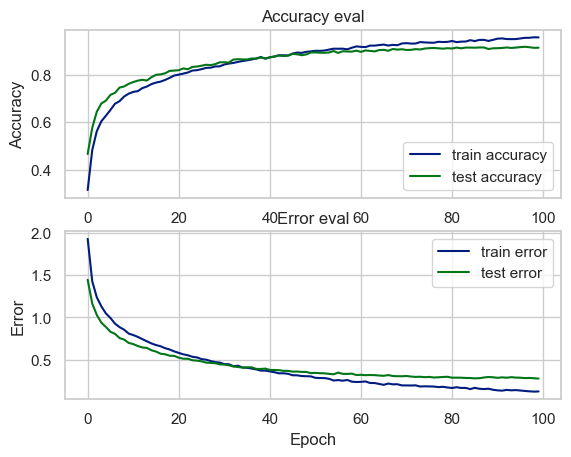

In [36]:
# Retrieve training and validation accuracy
train_accuracy = history.history['accuracy'][-1]  # Last epoch accuracy
test_accuracy = history.history['val_accuracy'][-1]  # Last epoch validation accuracy

# Print accuracies
print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)
plot_history(history)